# Introduction
The objective of this notebook is to programatically explain Spectograms. It is heavily dependent (_a rip off_) of the [following tutorial](https://fairyonice.github.io/implement-the-spectrogram-from-scratch-in-python.html) which is better in many aspects. [Video](https://www.youtube.com/watch?v=spUNpyF58BY) on Fourier Transform (FT) by 3Blue1Brown steals the show in explaning the very basic of FT.

### Step 1: Create a synthetic signal and plot it

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

def create_signal(Hz,sample_rate,length_ts_sec):
    ## 1 sec length time series with sampling rate 
    ts1sec = list(np.linspace(0,np.pi*2*Hz,sample_rate))
    ## 1 sec length time series with sampling rate 
    ts = ts1sec*length_ts_sec
    return(list(np.sin(ts)))

sample_rate   = 4000
length_ts_sec = 3
## --------------------------------- ##
## 3 seconds of "digit 1" sound
## Pressing digit 2 buttom generates 
## the sine waves at frequency 
## 697Hz and 1209Hz.
## --------------------------------- ##
ts1  = np.array(create_signal(697, sample_rate,length_ts_sec)) 
ts1 += np.array(create_signal(1209,sample_rate,length_ts_sec))
ts1  = list(ts1)

## -------------------- ##
## 1 seconds of silence
## -------------------- ##
ts_silence = [0]*sample_rate*1

## --------------------------------- ##
## 3 seconds of "digit 2" sounds 
## Pressing digit 2 buttom generates 
## the sine waves at frequency 
## 697Hz and 1336Hz.
## --------------------------------- ##
ts2  = np.array(create_signal(697, sample_rate,length_ts_sec)) 
ts2 += np.array(create_signal(1336,sample_rate,length_ts_sec))
ts2  = list(ts2)

## -------------------- ##
## Add up to 7 seconds
## ------------------- ##
ts = ts1 + ts_silence  + ts2

In [6]:
#Hear the audio
from IPython.display import Audio
Audio(ts, rate=sample_rate)

The total time series length = 7.0 sec (N points = 28000) 


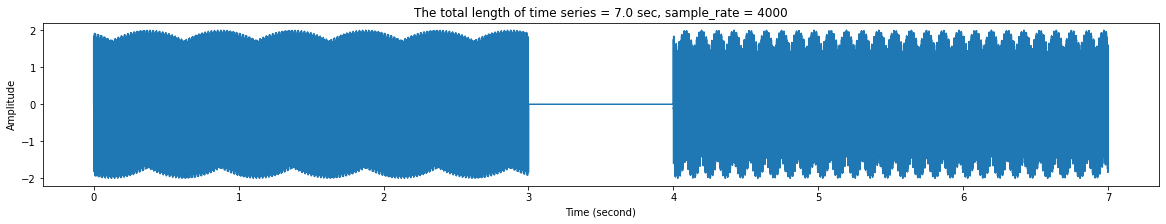

In [23]:
#plot the signal
total_ts_sec = len(ts)/sample_rate
print("The total time series length = {} sec (N points = {}) ".format(total_ts_sec, len(ts)))
ts_x = [i for i in np.linspace(0,total_ts_sec,int(sample_rate*total_ts_sec))]


fig, ax = plt.subplots(1,1, figsize=(20,3))

ax.plot(ts_x,ts)
#ax.xticks(np.arange(0,len(ts),sample_rate),np.arange(0,len(ts)/sample_rate,1))
ax.set_ylabel("Amplitude")
ax.set_xlabel("Time (second)")
ax.set_title("The total length of time series = {} sec, sample_rate = {}".format(len(ts)/sample_rate, sample_rate));

### Step 2: Plot the Fourier Transform of the Signal

In [ ]:
def get_xn(Xs,n):
    '''
    calculate the Fourier coefficient X_n of 
    Discrete Fourier Transform (DFT)
    '''
    L  = len(Xs)
    ks = np.arange(0,L,1)
    xn = np.sum(Xs*np.exp((1j*2*np.pi*ks*n)/L))/L
    return(xn)

def get_xns(ts):
    '''
    Compute Fourier coefficients only up to the Nyquest Limit Xn, n=1,...,L/2
    and multiply the absolute value of the Fourier coefficients by 2, 
    to account for the symetry of the Fourier coefficients above the Nyquest Limit. 
    '''
    mag = []
    L = len(ts)
    for n in range(int(L/2)): # Nyquest Limit
        mag.append(np.abs(get_xn(ts,n))*2)
    return(mag)
mag = get_xns(ts)